In [79]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
import matplotlib.image as image
import pandas as pd
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.patheffects as pe
import matplotlib.gridspec as gridspec
import matplotlib.transforms as transforms
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as patches
from matplotlib.patches import BoxStyle
from matplotlib.path import Path
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

# SOME HELPER FUNCTIONS

In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [3]:
def pre_slog(val):
    if val==0.0:
        return np.nan
    elif val > 0:
        return np.log10(val)
    else:
        return np.log10(-val)
slog=np.vectorize(pre_slog)

from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

def func(x, a, c):
    return a /x + c

def func2(x, a, c):
    return a /x**6 + c


def func_exp(x, a, b,c):
    #return a*np.e**(-b*x)+c
    return a*b**(-x) +c

def func_exp2(x, a, b,c,d):
    return a*np.e**(-b*x**2)+c
    #return a*b**(x) +c


def smoothme(x,y,smin,smax,newx):
    
    f = interp1d(x, y,kind='cubic')
    
    xp = np.linspace(smin,smax,100)
    ip = f(xp) #np.interp(xp,arr[:,0],arr[:,1])

    popt, pcov = curve_fit(func, xp, ip)

    #sp = savgol_filter(ip,7, 5) # window size 51, polynomial order 3
    
    return newx,func(newx, *popt)

def smoothme2(x,y,smin,smax,newx):
    
    f = interp1d(x, y,kind='cubic')
    
    xp = np.linspace(smin,smax,100)
    ip = f(xp) #np.interp(xp,arr[:,0],arr[:,1])

    popt, pcov = curve_fit(func_exp, xp, ip)
    
    #sp = savgol_filter(ip,7, 5) # window size 51, polynomial order 3
    
    return newx,func_exp(newx, *popt)

def smoothme3(x,y,smin,smax,newx):
    
    f = interp1d(x, y,kind='cubic')
    
    xp = np.linspace(smin,smax,100)
    ip = f(xp) #np.interp(xp,arr[:,0],arr[:,1])

    popt, pcov = curve_fit(func2, xp, ip)

    #sp = savgol_filter(ip,7, 5) # window size 51, polynomial order 3
    
    return newx,func2(newx, *popt)

# THIS SECTION DEFINES THE FUNCTIONS FOR THE FIGURE AND PLOTTING STYLES

In [119]:
def set_spines(axs,boff=True):
    for axis in ['bottom','left',]:
        axs.spines[axis].set_linewidth(2.5)

    for axis in ['top','right']:
        axs.spines[axis].set_linewidth(2.5)

    #for axis in ['left']:
    #    axs.spines[axis].set_bounds(-9,0)

    #for axis in ['bottom']:
    #    axs.spines[axis].set_bounds(0,100)
    
    if not boff:
        axs.spines['bottom'].set_linewidth(0)
        
        
def plot_img(axs,img):
    
    for axis in ['bottom','left',]:
        axs.spines[axis].set_linewidth(0)

    for axis in ['top','right']:
        axs.spines[axis].set_linewidth(0)
        
    axs.set_xticks([])
    axs.set_yticks([])
    axs.set_yticklabels([])
    axs.set_xticklabels([])
    
    axs.imshow(img,rasterized=True)
    
    
        
        
        
def make_plot_1(axs,xt=True,yt=True,xlabel=True,ylabel=True,yticklabels=True,nfs=20,mfs=30):


    #axs.set_yscale('log')
    
    #axs.axhline(y=-8,ls="--",xmin=0.03,xmax=0.97,c="k",lw=2,zorder=-1)
    #axs.set_xlim(2.28,2.52)
    #axs.set_ylim(-0.1,0.6)
    axs.set_xlim(-0.1,10.1)
    axs.set_ylim(-0.05,1.05)
    
    axs.tick_params(length=10,width=2.5,direction="out")
    set_spines(axs)
    
    axs.axhline(y=0,c="k",ls="--",lw=2)

    #xticks = list(range(0,101,20))
    #yticks = list(range(-9,1,1))
    
    #axs.set_xticks(xticks)
    #axs.set_yticks(yticks)

    if xt==True:
        xticks = [0,2,4,6,8,10]
        xtl=xticks #[r'Au$_{\mathrm{2}}$',r'Au$_{\mathrm{4}}$',r'Au$_{\mathrm{6}}$',r'Au$_{\mathrm{8}}$']
        axs.set_xticks(xticks)
        axs.set_xticklabels(xtl,fontsize=nfs)
    else:
        xticks=[]
        axs.set_xticks(xticks)
        axs.set_xticklabels([],fontsize=nfs)
        
    if yt==True:
        yticks = [0,0.25,0.5,0.75,1]
        ytl= np.array(yticks).astype(str)
        axs.set_yticks(yticks)
        if yticklabels:
            axs.set_yticklabels(ytl,fontsize=nfs)
        else:
            axs.set_yticklabels([],fontsize=nfs)
    else:
        yticks=[]
        axs.set_yticks(yticks)
        axs.set_yticklabels([],fontsize=nfs)


    if xlabel==True:
        axs.set_xlabel(r"$\varepsilon$",fontsize=mfs)

    if ylabel==True:
        axs.set_ylabel(r'E-E$_{\rm{min}}$ (10$^{-2}$ a.u.)',fontsize=mfs)
        
    plt.minorticks_off()

    
    

def make_plot_2(axs,xt=True,yt=True,xlabel=True,ylabel=True,yticklabels=True,nfs=20,mfs=30):


    #axs.set_yscale('log')
    
    #axs.axhline(y=-8,ls="--",xmin=0.03,xmax=0.97,c="k",lw=2,zorder=-1)
    #axs.set_xlim(2.28,2.52)
    #axs.set_ylim(-0.1,0.6)
    axs.set_xlim(-0.1,5.1)
    axs.set_ylim(-0.05,1.05)
    
    axs.tick_params(length=10,width=2.5,direction="out")
    set_spines(axs)
    
    axs.axhline(y=0,c="k",ls="--",lw=2)

    #xticks = list(range(0,101,20))
    #yticks = list(range(-9,1,1))
    
    #axs.set_xticks(xticks)
    #axs.set_yticks(yticks)

    if xt==True:
        xticks = [0.5,1.5,2.5,3.5,4.5]
        xtl= ["1B", "2B", "3B", "4B", "5B"]
        axs.set_xticks(xticks)
        axs.set_xticklabels(xtl,fontsize=nfs)
    else:
        xticks=[]
        axs.set_xticks(xticks)
        axs.set_xticklabels([],fontsize=nfs)
        
    if yt==True:
        yticks = [0,0.25,0.5,0.75,1]
        ytl= np.array(yticks).astype(str)
        axs.set_yticks(yticks)
        if yticklabels:
            axs.set_yticklabels(ytl,fontsize=nfs)
        else:
            axs.set_yticklabels([],fontsize=nfs)
    else:
        yticks=[]
        axs.set_yticks(yticks)
        axs.set_yticklabels([],fontsize=nfs)


    if xlabel==True:
        axs.set_xlabel(r"$\varepsilon$",fontsize=mfs)

    if ylabel==True:
        axs.set_ylabel(r'E-E$_{\rm{min}}$ (10$^{-2}$ a.u.)',fontsize=mfs)
        
    plt.minorticks_off()

    

        
def make_inset(axs,xt=True,yt=True,xlabel=True,ylabel=True,yticklabels=True):
    mfs=30
    nfs=20

    #axs.set_yscale('log')
    
    #axs.axhline(y=-8,ls="--",xmin=0.03,xmax=0.97,c="k",lw=2,zorder=-1)
    axs.set_xlim(-0.5,3.5)
    axs.set_ylim(300,1900)
    
    axs.tick_params(length=10,width=2.5,direction="out")
    set_spines(axs)
    
    axs.axhline(y=0,c="k",ls="--",lw=2)

    #xticks = list(range(0,101,20))
    #yticks = list(range(-9,1,1))
    
    #axs.set_xticks(xticks)
    #axs.set_yticks(yticks)

    if xt==True:
        xticks = [0,1,2,3]
        xtl=[r'',r'',r'',r'']
        axs.set_xticks(xticks)
        axs.set_xticklabels(xtl,fontsize=nfs)
    else:
        xticks=[]
        axs.set_xticks(xticks)
        axs.set_xticklabels([],fontsize=nfs)
        
    if yt==True:
        yticks = [-5,-2.5,0,2.5,5]
        ytl= np.array(yticks).astype(str)
        #ytl= ["0","20","40","60","80","100","120","140","160","180","200"]
        axs.set_yticks(yticks)
        if yticklabels:
            axs.set_yticklabels(ytl,fontsize=nfs)
        else:
            axs.set_yticklabels([],fontsize=nfs)
    else:
        yticks=[]
        axs.set_yticks(yticks)
        axs.set_yticklabels([],fontsize=nfs)


    if xlabel==True:
        axs.set_xlabel(r"$\varepsilon$",fontsize=mfs)

    if ylabel==True:
        axs.set_ylabel(r'$\Delta$E (a.u.)',fontsize=mfs)
        
    plt.minorticks_off()


        
        
def plot_data(axs,x,y,c='tomato',marker=r'$\Join$',zorder=-1,ls="-"):
    

    #newx=np.linspace(0.1,100,1000)

    #xxx, yyy = smoothme(x,y,2,98,newx)
    
    outline_color="k"
    if c=="k" and ls !="-":
        outline_color="w"
        
    #offset = lambda p: transforms.ScaledTranslation(0,p/72, plt.gcf().dpi_scale_trans)
    #trans = plt.gca().transData
    
    ## clean data if zero:
    
    for i in list(range(len(y))):
        if y[i]==0.0:
            y[i]=2e-11
    

    dashes=(5,5)
    dashes2=(1,5)
    if ls =="--":
        axs.plot(x,y,c=lighten_color(c, amount=0.8),ls=ls,lw=2,dashes = dashes,
             path_effects=[pe.Stroke(linewidth=5, foreground=outline_color,capstyle='round'), pe.Normal()])

        axs.plot(x,y,c=lighten_color(c, amount=0.8),ls=ls,lw=2,dashes=dashes,
             path_effects=[pe.Stroke(linewidth=2, foreground=c,capstyle='round'), pe.Normal()])
        
    elif ls ==":":
        axs.plot(x,y,c=lighten_color(c, amount=0.8),ls=ls,lw=2,dashes = dashes2,
             path_effects=[pe.Stroke(linewidth=5, foreground=outline_color,capstyle='round'), pe.Normal()])

        axs.plot(x,y,c=lighten_color(c, amount=0.8),ls=ls,lw=2,dashes=dashes2,
             path_effects=[pe.Stroke(linewidth=2, foreground=c,capstyle='round'), pe.Normal()])   
        
        

    else:
        axs.plot(x,y,c=lighten_color(c, amount=0.8),ls=ls,lw=2,
             path_effects=[pe.Stroke(linewidth=5, foreground=outline_color,capstyle='round'), pe.Normal()])

        axs.plot(x,y,c=lighten_color(c, amount=0.8),ls=ls,lw=2,
             path_effects=[pe.Stroke(linewidth=2, foreground=c,capstyle='round'), pe.Normal()])    
    #axs.plot(x,y,c="k",ls=ls,lw=2.1)
    #axs.plot(x,y,c=lighten_color(c, amount=0.8),ls=ls,lw=2)

    
    
    ms=15
    if marker=="o":
        ms=17
    if marker=="+":
        ms=10
    axs.plot(x,y,ms=ms,mew=2,mec=c,mfc="none",marker=marker,c=c,
             ls="None",lw=2.3,path_effects=[pe.Stroke(linewidth=5, foreground='k',capstyle='round'), pe.Normal()])
    
    
    axs.plot(x,y,ms=ms,mew=2,mec=c,mfc="none",marker=marker,c=c,
             ls="None",lw=2.3,path_effects=[pe.Stroke(linewidth=2, foreground=c,capstyle='round'), pe.Normal()])
    
    

def plot_data_barplot(axs,x,y,c='tomato',marker=r'$\Join$',zorder=-1,ls="-",align="center",width=0.8,hatch="/",v2=False):
    
    axs.bar(x,y,edgecolor="k",color=c,align=align,width=width)
    
    #return
    
    new_patches = []
    
    count =0
    for patch in reversed(axs.patches):
        bb = patch.get_bbox()
        color=patch.get_facecolor()
        p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=-0.0040,rounding_size=0.02",
                            ec="black", fc=color,lw=2,hatch=hatch,
                            mutation_aspect=1
                            )
        patch.remove()
        new_patches.append(p_bbox)
        
        count +=1
    for patch in new_patches:
        axs.add_patch(patch)

def set_text(axs, text):
    mfs=40
    nfs=20
    axs.text(s=text,x=0.15,y=0.9,fontsize=nfs, ha="center",path_effects=[pe.withStroke(linewidth=6, foreground="white")])

In [107]:
def make_legend_lines(axs,keys,colors,linestyles=[],markers=[],position=(0.0, 0.0, 0.3, 1.0),ncol=1,fontsize=15,barplot=False):
    
    if len(markers)==0:
        markers=len(keys)*['none']
        
    if len(linestyles)==0:
        linestyles=len(keys)*['-']
    
    lines  = []
    lines2 = []
    
    
    lw1= 2
    lw2= 5
    lw3 = 2
    lw4 = 2
    if barplot:
        lw1= 2
        lw2= 20
        lw3 = 10
        lw4 = 16

    
    for i in list(range(0,len(keys))):
        
        l2d=Line2D([0], [0], color='k', linewidth=lw1, linestyle=linestyles[i],mfc="none",marker=markers[i],ms=15,
                path_effects=[pe.Stroke(linewidth=lw2, foreground='k',capstyle='round'), pe.Normal()])
        
        if linestyles[i] == "--":
            l2d=Line2D([0], [0], color='k', linewidth=lw1, linestyle='--',mfc="none",dashes=(3,5),marker=markers[i],ms=15,
                    path_effects=[pe.Stroke(linewidth=lw2, foreground='k',capstyle='round'), pe.Normal()])
        if linestyles[i] == ":":
            l2d=Line2D([0], [0], color='k', linewidth=lw1, linestyle='--',mfc="none",dashes=(1,5),marker=markers[i],ms=15,
                    path_effects=[pe.Stroke(linewidth=lw2, foreground='k',capstyle='round'), pe.Normal()])
            
            
        l2d2=Line2D([0], [0], color=colors[i], linewidth=lw3, linestyle=linestyles[i],mfc="none",marker=markers[i],ms=15,
                path_effects=[pe.Stroke(linewidth=lw4, foreground=colors[i],capstyle='round'), pe.Normal()])
        
        if linestyles[i] == "--":
            l2d2=Line2D([0], [0], color=colors[i], linewidth=lw3, linestyle='--',mfc="none",dashes=(3,5),marker=markers[i],ms=15,
                    path_effects=[pe.Stroke(linewidth=lw4, foreground=colors[i],capstyle='round'), pe.Normal()])
        if linestyles[i] == ":":
            l2d2=Line2D([0], [0], color=colors[i], linewidth=lw3, linestyle='--',mfc="none",dashes=(1,5),marker=markers[i],ms=15,
                    path_effects=[pe.Stroke(linewidth=lw4, foreground=colors[i],capstyle='round'), pe.Normal()])
            
            
        lines.append(l2d)
        lines2.append(l2d2)
        
    l1=axs.legend(lines, keys, frameon=False, ncol=ncol, fontsize=fontsize, loc="center", bbox_to_anchor=position)
    l2=axs.legend(lines2, keys, frameon=False, ncol=ncol, fontsize=fontsize, loc="center", bbox_to_anchor=position)

    plt.gca().add_artist(l1)

            

    
    


# SAMPLE DATA

In [133]:
x = np.linspace(0,10,100)
f = lambda x: (x/10)**2
y =f(x)

barx =np.array([0.5,1.5,2.5,3.5,4.5])
bary = np.array([0.7,0.6,0.5,0.25,0.45,])

# DOUBLE PANEL LINE PLOT

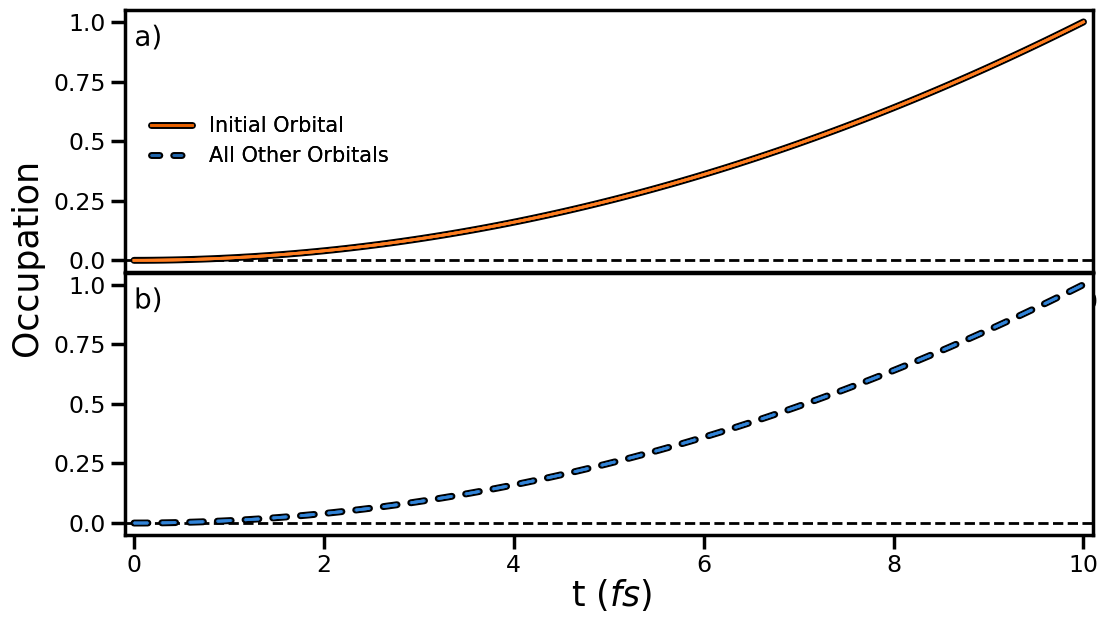

In [74]:
srat=5
xx=3*srat
yy=1.5*srat


fig = plt.figure(tight_layout=True,figsize=(xx,yy))
gs = gridspec.GridSpec(220,120)
gsl = [gs[0:100, 0:100],gs[100:200, 0:100]]

letlist=['a)','b)','c)']
    
myred='#e66101' # '#b2182b'
myblue = '#2166ac'
        
for gs in list(range(0,len(gsl))):
    xticks=True    
    yticks=True
    xlabel=True
    ylabel=False
    yticklabels=True
    text=""
    
    if gs in [0]:
        xticks=True
        xlabel=False
        yticks=True
        text="test"
        lab = text
        spin="vector"
    else:
        xticks=True
        xlabel=False
        yticks=True
        ylabel=False
        yticklabels=True
        text="test"
        lab = text
        spin="vector"

    axs = fig.add_subplot(gsl[gs])
    
    make_plot_1(axs,xt=xticks,yt=yticks,xlabel=xlabel,ylabel=ylabel,yticklabels=yticklabels,nfs=17)
    
    ixl = [0,0,0]
    

    if gs in [0]:
        plot_data(axs,x,y,c=myred,marker="none",ls="-")
        set_text(axs,letlist[gs])
        
        make_legend_lines(axs,["Initial Orbital","All Other Orbitals"],[myred,myblue],linestyles=['-','--'],
            markers=['none','none'],position=(0.0, 0.0, 0.3, 1.0),ncol=1,fontsize=15)


    if gs in [1]:
        plot_data(axs,x,y,c=myblue,marker="none",ls="--")
        set_text(axs,letlist[gs])


fig.text(x=0.45,y=0.1,s=r't ($fs$)',fontsize=25,rotation="horizontal",va="center",ha="center")
fig.text(x=0.06,y=0.55,s=r'Occupation',fontsize=25,rotation="vertical",va="center",ha="center")


fname="f2_v1"
#plt.savefig(fname+".png",format="png",dpi=600,bbox_inches='tight')
#plt.savefig(fname+".pdf",format="pdf",dpi=600,bbox_inches='tight')

plt.show()

# SINGLE PANEL BAR PLOT

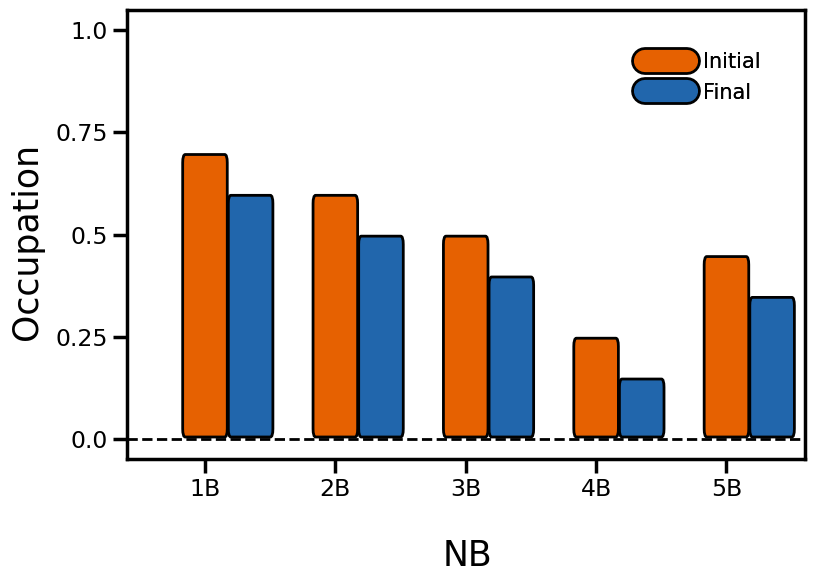

In [138]:
srat=7
xx=1.5*srat
yy=1*srat


fig = plt.figure(tight_layout=True,figsize=(xx,yy))
gs = gridspec.GridSpec(120,120)
gsl = [gs[0:100, 0:100]]

letlist=['a)','b)','c)']
    
myred='#e66101' # '#b2182b'
myblue = '#2166ac'
        
for gs in list(range(0,len(gsl))):
    xticks=True    
    yticks=True
    xlabel=True
    ylabel=False
    yticklabels=True
    text=""
    
    if gs in [0]:
        xticks=True
        xlabel=False
        yticks=True
        text="test"
        lab = text
        spin="vector"
    else:
        xticks=True
        xlabel=False
        yticks=True
        ylabel=False
        yticklabels=True
        text="test"
        lab = text
        spin="vector"

    axs = fig.add_subplot(gsl[gs])
    
    make_plot_2(axs,xt=xticks,yt=yticks,xlabel=xlabel,ylabel=ylabel,yticklabels=yticklabels,nfs=17)
    
    ixl = [0,0,0]
    

    if gs in [0]:
        plot_data_barplot(axs,barx,bary,c=myred,marker="o",ls="-",width=0.35,align='center',hatch="")
        plot_data_barplot(axs,barx+0.35,bary-0.1,c=myblue,marker="o",ls="-",width=0.35,align='center',hatch="")


        
        make_legend_lines(axs,["Initial","Final"],[myred,myblue],linestyles=['-','-'],
            markers=['none','none'],position=(0.0, 0.0, 1.7, 1.7),ncol=1,fontsize=15, barplot=True)



fig.text(x=0.45,y=0.1,s=r'NB',fontsize=25,rotation="horizontal",va="center",ha="center")
fig.text(x=0.03,y=0.55,s=r'Occupation',fontsize=25,rotation="vertical",va="center",ha="center")


fname="f2_v1"
#plt.savefig(fname+".png",format="png",dpi=600,bbox_inches='tight')
#plt.savefig(fname+".pdf",format="pdf",dpi=600,bbox_inches='tight')

plt.show()